In [1]:
import numpy as np
import matplotlib.pyplot as plt

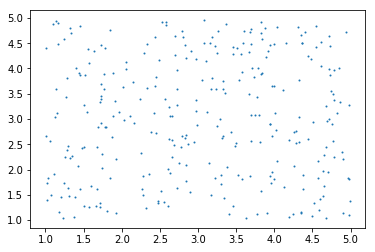

In [20]:
np.random.seed(27)

def generateParams():
    beta = 1 + 4 * np.random.rand()
    N = 1  + 4 * np.random.rand()

    return beta, N

B, N = [], []

for i in range(300):
    beta, N_rand = generateParams()
    B.append(beta)
    N.append(N_rand)
    
plt.scatter(B,N, s=1)